<a href="https://colab.research.google.com/github/white9812/notimportant_ai/blob/main/0729_%EB%8C%80%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#합쳐진 데이터셋 불러오기
concat_csv=os.listdir("/content/drive/MyDrive/filled_data/filled_data")
concat_Df=[]
for concat_csv_path in concat_csv:


    path="/content/drive/MyDrive/filled_data/filled_data/"
    c_df=pd.read_csv(path+f"{concat_csv_path}") #station의 데이터 이름에 데이터 프레임 저장하기
    concat_Df.append(c_df)



In [ ]:
concat_csv

['대구시.csv',
 '광주시.csv',
 '경상북도.csv',
 '경상남도.csv',
 '경기도.csv',
 '강원도.csv',
 '충청북도.csv',
 '충청남도.csv',
 '제주도.csv',
 '전라북도.csv',
 '전라남도.csv',
 '인천시.csv',
 '울산시.csv',
 '세종시.csv',
 '서울시.csv',
 '부산시.csv',
 '대전시.csv']

In [ ]:
concat_Df[0] #대구

,시간,지점명,Solar_Power(MWh),일사,일조,습도,지면온도,시정,기온,중하층운량,풍속,전운량,강수량,해면기압,풍향,적설,현지기압,증기압,최저운고,이슬점온도
0,2017년01월01일01시,대구,0.00,0.00,0.0,90.0,-1.6,830.0,-0.1,0.0,0.6,NaN,NaN,1029.6,340.0,NaN,1023.3,5.5,NaN,-1.5
1,2017년01월01일02시,대구,0.00,0.00,0.0,91.0,-2.2,726.0,-0.3,0.0,0.2,NaN,NaN,1029.4,0.0,NaN,1023.1,5.5,NaN,-1.5
2,2017년01월01일03시,대구,0.00,0.00,0.0,93.0,-3.0,586.0,-0.9,0.0,0.0,0.0,NaN,1029.6,0.0,NaN,1023.3,5.4,NaN,-1.8
3,2017년01월01일04시,대구,0.00,0.00,0.0,94.0,-3.6,490.0,-1.5,0.0,0.3,0.0,NaN,1029.5,0.0,NaN,1023.2,5.2,NaN,-2.3
4,2017년01월01일05시,대구,0.00,0.00,0.0,95.0,-3.8,575.0,-1.6,0.0,0.2,0.0,NaN,1029.2,0.0,NaN,1022.9,5.2,NaN,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53994,2023-02-28 19:00,대구,1.37,0.02,0.0,27.0,8.6,2000.0,14.2,0.0,2.3,6.0,NaN,1022.7,270.0,NaN,1016.2,4.4,NaN,-4.5
53995,2023-02-28 20:00,대구,3.51,0.00,0.0,33.0,6.2,2000.0,12.0,0.0,1.3,3.0,NaN,1023.3,90.0,NaN,1016.7,4.6,NaN,-3.8
53996,2023-02-28 21:00,대구,3.36,0.00,0.0,39.0,5.5,2000.0,10.8,0.0,1.1,9.0,NaN,1023.5,90.0,NaN,1016.9,5.0,NaN,-2.6
53997,2023-02-28 22:00,대구,2.69,0.00,0.0,46.0,4.9,2000.0,9.6,0.0,0.6,5.0,NaN,1023.7,70.0,NaN,1017.1,5.5,NaN,-1.4


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from tqdm import tqdm


In [ ]:
corr_data=concat_Df[0][[ 'Solar_Power(MWh)', '일사', '일조', '습도', '지면온도', '시정', '기온',
       '중하층운량', '풍속', '전운량', '강수량', '해면기압', '풍향', '적설', '현지기압', '증기압', '최저운고',
       '이슬점온도']].corr()

In [ ]:
df_imputed_corr=round(corr_data.abs(),2)
correlations_solar_power =df_imputed_corr.loc[:, "Solar_Power(MWh)"]
high_correlations = correlations_solar_power[correlations_solar_power >= 0.2]

In [ ]:
corr_list=high_correlations.index.to_list()

In [ ]:
sampledata=concat_Df[0][corr_list].copy()

In [ ]:
sampledata.isna().sum()

Solar_Power(MWh)       0
일사                     0
일조                     0
습도                     1
지면온도                   9
기온                     1
풍속                     2
전운량                 3206
풍향                     2
dtype: int64

In [ ]:
# Custom IterativeImputer to show progress
class IterativeImputerWithProgress(IterativeImputer):
    def __init__(self, estimator=None, missing_values=np.nan, sample_posterior=False, max_iter=30,
                 tol=1e-3, n_nearest_features=None, initial_strategy="mean", imputation_order='ascending',
                 skip_complete=False, min_value=None, max_value=None, verbose=0, random_state=None, add_indicator=False):
        super().__init__(estimator=estimator, missing_values=missing_values, sample_posterior=sample_posterior,
                         max_iter=max_iter, tol=tol, n_nearest_features=n_nearest_features, initial_strategy=initial_strategy,
                         imputation_order=imputation_order, skip_complete=skip_complete, min_value=min_value,
                         max_value=max_value, verbose=verbose, random_state=random_state, add_indicator=add_indicator)
        self._tqdm = None

    def fit_transform(self, X, y=None):
        self._tqdm = tqdm(total=self.max_iter, desc='Imputation Progress')
        result = super().fit_transform(X, y)
        self._tqdm.close()
        return result

    def _impute_one_feature(self, X_filled, mask_missing_values, feat_idx, neighbor_feat_idx, estimator=None, fit_mode=True):
        imputed_values = super()._impute_one_feature(X_filled, mask_missing_values, feat_idx, neighbor_feat_idx, estimator, fit_mode)
        if fit_mode:
            self._tqdm.update(1)
        return imputed_values

# RandomForestRegressor 설정 조정
reduced_rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0)

# 배치 크기 설정
batch_size = len(sampledata)

# 배치별로 MissForest 알고리즘 적용
imputed_batches = []
n_batches = int(np.ceil(len(sampledata) / batch_size))

for i in range(n_batches):
    batch = sampledata.iloc[i * batch_size:(i + 1) * batch_size]
    imputer = IterativeImputerWithProgress(estimator=reduced_rf, max_iter=30, random_state=0, add_indicator=False)
    imputed_batch = imputer.fit_transform(batch)
    # 반환된 imputed_batch의 형태 확인
    print(f"Batch {i+1} shape: {imputed_batch.shape}")

    # 데이터프레임으로 변환
    imputed_batch_df = pd.DataFrame(imputed_batch, columns=sampledata.columns[:imputed_batch.shape[1]])
    imputed_batches.append(imputed_batch_df)



# 배치 결합
df_imputed = pd.concat(imputed_batches, axis=0).reset_index(drop=True)

#데이터 내보내기
df_imputed.to_csv("대구시_0729_filed.csv",index=False)


Imputation Progress: 100%|██████████| 30/30 [03:13<00:00,  6.46s/it]
Imputation Progress: 31it [03:19,  6.31s/it]                        
Imputation Progress: 32it [03:26,  6.45s/it]
Imputation Progress: 33it [03:32,  6.36s/it]
Imputation Progress: 34it [03:39,  6.53s/it]
Imputation Progress: 35it [03:44,  6.27s/it]
Imputation Progress: 36it [03:51,  6.33s/it]
Imputation Progress: 37it [03:57,  6.25s/it]
Imputation Progress: 38it [04:03,  6.33s/it]
Imputation Progress: 39it [04:10,  6.41s/it]
Imputation Progress: 40it [04:16,  6.29s/it]
Imputation Progress: 41it [04:23,  6.45s/it]
Imputation Progress: 42it [04:31,  7.08s/it]
Imputation Progress: 43it [04:38,  6.99s/it]
Imputation Progress: 44it [04:44,  6.60s/it]
Imputation Progress: 45it [04:51,  6.68s/it]
Imputation Progress: 46it [04:56,  6.35s/it]
Imputation Progress: 47it [05:04,  6.63s/it]
Imputation Progress: 48it [05:09,  6.38s/it]
Imputation Progress: 49it [05:16,  6.55s/it]
Imputation Progress: 50it [05:22,  6.28s/it]
Imputa

Batch 1 shape: (53999, 9)


In [ ]:
df_imputed.isna().sum()

Solar_Power(MWh)    0
일사                  0
일조                  0
습도                  0
지면온도                0
기온                  0
풍속                  0
전운량                 0
풍향                  0
dtype: int64

In [ ]:

from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split



In [ ]:
pip install pandas numpy matplotlib scikit-learn tensorflow


In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
concat_Df[0]["시간"]

0          2017년01월01일01시
1          2017년01월01일02시
2          2017년01월01일03시
3          2017년01월01일04시
4          2017년01월01일05시
               ...       
53994    2023-02-28 19:00
53995    2023-02-28 20:00
53996    2023-02-28 21:00
53997    2023-02-28 22:00
53998    2023-02-28 23:00
Name: 시간, Length: 53999, dtype: object

In [ ]:
timestring=concat_Df[0]["시간"].to_list()
t=[]
for i in timestring:
  if "년" in i:
    if "24시" in i:
      i=i.replace("24시","00시")
      i=pd.to_datetime(i,format="%Y년%m월%d일%H시")
      i.strftime("%Y-%m-%d %H:%M:%S")
      t.append(i)
    else:
      i=pd.to_datetime(i,format="%Y년%m월%d일%H시")
      i.strftime("%Y-%m-%d %H:%M:%S")
      t.append(i)
  else:
    t.append(i)




In [ ]:
t=pd.DataFrame(t)

In [ ]:
t.tail()

,0
53994,2023-02-28 19:00
53995,2023-02-28 20:00
53996,2023-02-28 21:00
53997,2023-02-28 22:00
53998,2023-02-28 23:00


In [ ]:
df_imputed["시간"]=t

In [ ]:
t

,0
0,2017-01-01 01:00:00
1,2017-01-01 02:00:00
2,2017-01-01 03:00:00
3,2017-01-01 04:00:00
4,2017-01-01 05:00:00
...,...
53994,2023-02-28 19:00
53995,2023-02-28 20:00
53996,2023-02-28 21:00
53997,2023-02-28 22:00


In [ ]:
df_imputed["시간"]=t

In [ ]:
df_imputed

,Solar_Power(MWh),일사,일조,습도,지면온도,기온,풍속,전운량,풍향,시간,Cluster
0,0.00,0.00,0.0,90.0,-1.6,-0.1,0.6,2.667525,340.0,2017-01-01 01:00:00,1
1,0.00,0.00,0.0,91.0,-2.2,-0.3,0.2,1.130195,0.0,2017-01-01 02:00:00,1
2,0.00,0.00,0.0,93.0,-3.0,-0.9,0.0,0.000000,0.0,2017-01-01 03:00:00,1
3,0.00,0.00,0.0,94.0,-3.6,-1.5,0.3,0.000000,0.0,2017-01-01 04:00:00,1
4,0.00,0.00,0.0,95.0,-3.8,-1.6,0.2,0.000000,0.0,2017-01-01 05:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...
53994,1.37,0.02,0.0,27.0,8.6,14.2,2.3,6.000000,270.0,2023-02-28 19:00,1
53995,3.51,0.00,0.0,33.0,6.2,12.0,1.3,3.000000,90.0,2023-02-28 20:00,1
53996,3.36,0.00,0.0,39.0,5.5,10.8,1.1,9.000000,90.0,2023-02-28 21:00,1
53997,2.69,0.00,0.0,46.0,4.9,9.6,0.6,5.000000,70.0,2023-02-28 22:00,1


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
scaler = RobustScaler()
data_scaled = scaler.fit_transform(df_imputed[['일사', '일조']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

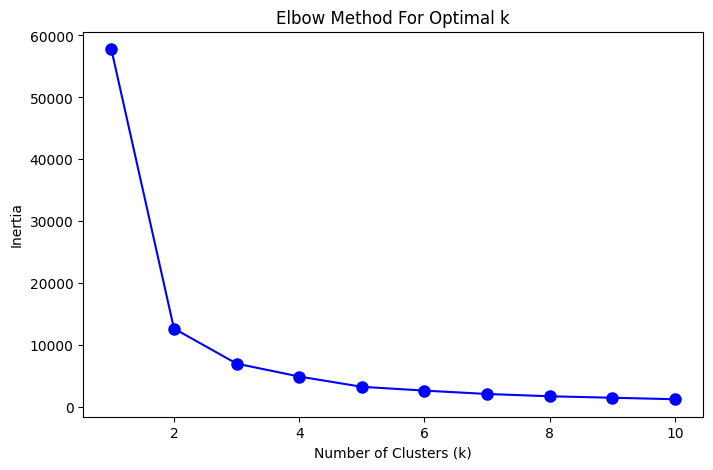

In [ ]:
# 클러스터 수를 달리하면서 KMeans 적용 및 Inertia 계산
inertia_values = []
K = range(1, 11)  # 1부터 10까지 클러스터 수에 대해 테스트

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia_values.append(kmeans.inertia_)

# Inertia 값 시각화
plt.figure(figsize=(8, 5))
plt.plot(K, inertia_values, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# 최적의 군집 수 설정 (엘보우 그래프 참고)
optimal_clusters = 4

# KMeans 클러스터링


kmeans = KMeans(n_clusters=optimal_clusters, random_state=42).fit(data_scaled)
df_imputed['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
from sklearn.model_selection import  GridSearchCV

In [ ]:
# GridSearchCV를 사용하여 하이퍼파라미터 튜닝
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'feature_fraction': [0.8, 0.9, 1.0],
    'bagging_fraction': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

In [ ]:
data=df_imputed.copy()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 3623, number of used features: 12
[LightGBM] [Info] Start training from score 0.162701


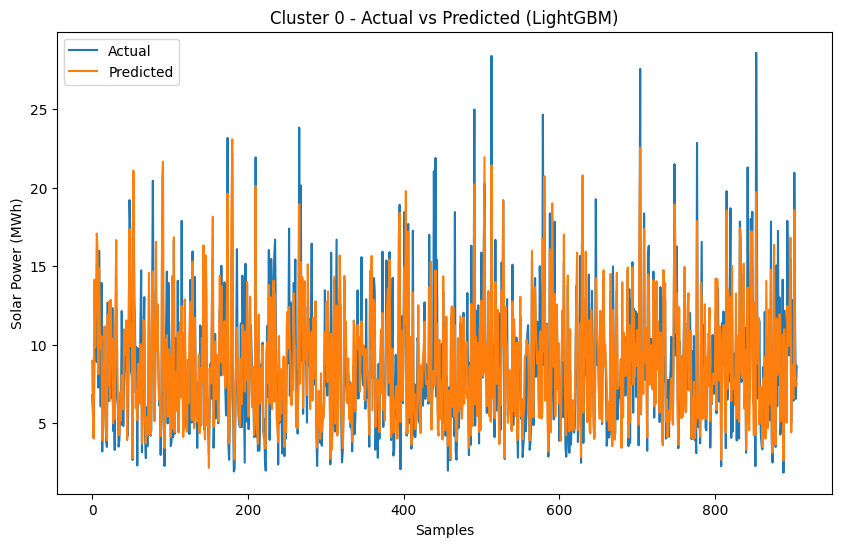

Epoch 1/100
113/113 [==============================] - 11s 23ms/step - loss: 1.1818 - val_loss: 0.5035 - lr: 0.0010
Epoch 2/100
113/113 [==============================] - 1s 12ms/step - loss: 0.7771 - val_loss: 0.4448 - lr: 0.0010
Epoch 3/100
113/113 [==============================] - 1s 12ms/step - loss: 0.6173 - val_loss: 0.3846 - lr: 0.0010
Epoch 4/100
113/113 [==============================] - 1s 12ms/step - loss: 0.5536 - val_loss: 0.3832 - lr: 0.0010
Epoch 5/100
113/113 [==============================] - 2s 15ms/step - loss: 0.4994 - val_loss: 0.3594 - lr: 0.0010
Epoch 6/100
113/113 [==============================] - 2s 17ms/step - loss: 0.4542 - val_loss: 0.3625 - lr: 0.0010
Epoch 7/100
113/113 [==============================] - 2s 17ms/step - loss: 0.4409 - val_loss: 0.3713 - lr: 0.0010
Epoch 8/100
113/113 [==============================] - 2s 14ms/step - loss: 0.4062 - val_loss: 0.3568 - lr: 0.0010
Epoch 9/100
113/113 [==============================] - 1s 12ms/step - loss: 0.4

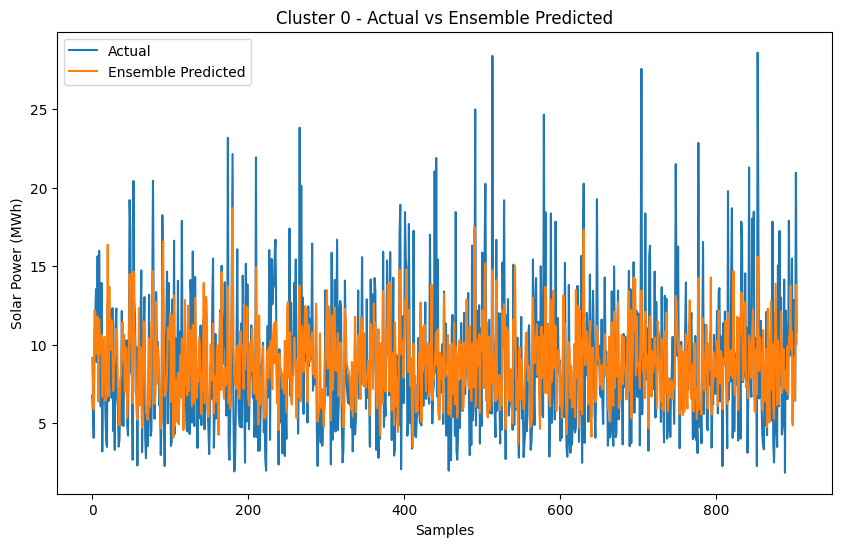

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 27483, number of used features: 12
[LightGBM] [Info] Start training from score 0.612569


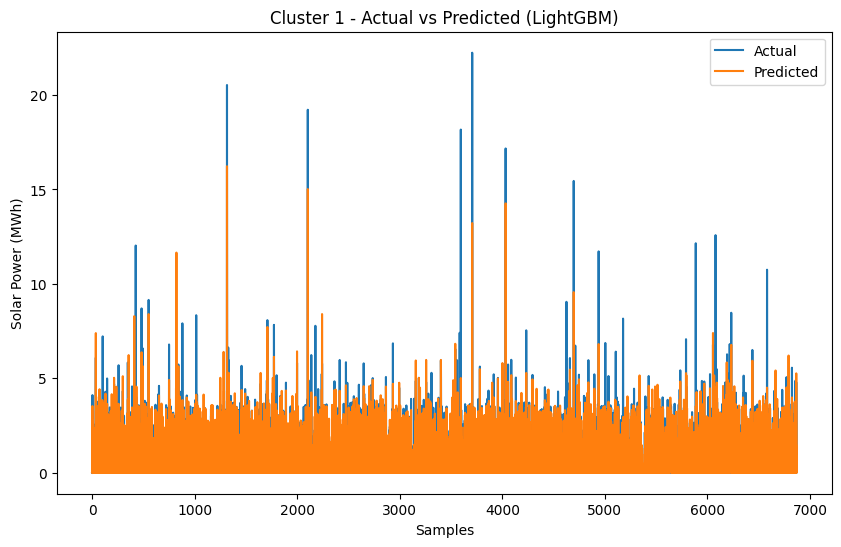

Epoch 1/100
859/859 [==============================] - 22s 16ms/step - loss: 0.9000 - val_loss: 0.4549 - lr: 0.0010
Epoch 2/100
859/859 [==============================] - 11s 12ms/step - loss: 0.5418 - val_loss: 0.3937 - lr: 0.0010
Epoch 3/100
859/859 [==============================] - 12s 14ms/step - loss: 0.4908 - val_loss: 0.3681 - lr: 0.0010
Epoch 4/100
859/859 [==============================] - 12s 14ms/step - loss: 0.4622 - val_loss: 0.3608 - lr: 0.0010
Epoch 5/100
859/859 [==============================] - 11s 13ms/step - loss: 0.4358 - val_loss: 0.3669 - lr: 0.0010
Epoch 6/100
859/859 [==============================] - 11s 13ms/step - loss: 0.4224 - val_loss: 0.3293 - lr: 0.0010
Epoch 7/100
859/859 [==============================] - 12s 14ms/step - loss: 0.4041 - val_loss: 0.3251 - lr: 0.0010
Epoch 8/100
859/859 [==============================] - 12s 14ms/step - loss: 0.4045 - val_loss: 0.3183 - lr: 0.0010
Epoch 9/100
859/859 [==============================] - 10s 12ms/step - l

<ipython-input-77-95c590b50ffe>:161: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test_orig - y_pred_lgb_original) / y_test_orig)) * 100
<ipython-input-77-95c590b50ffe>:161: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test_orig - y_pred_lgb_original) / y_test_orig)) * 100
<ipython-input-77-95c590b50ffe>:162: RuntimeWarning: invalid value encountered in divide
  smape = np.mean(2.0 * np.abs(y_test_orig - y_pred_lgb_original) / (np.abs(y_test_orig) + np.abs(y_pred_lgb_original))) * 100


Cluster 1 - Ensemble RMSE: 1.0160488396366432
Cluster 1 - Ensemble MAE: 0.6179613555134615


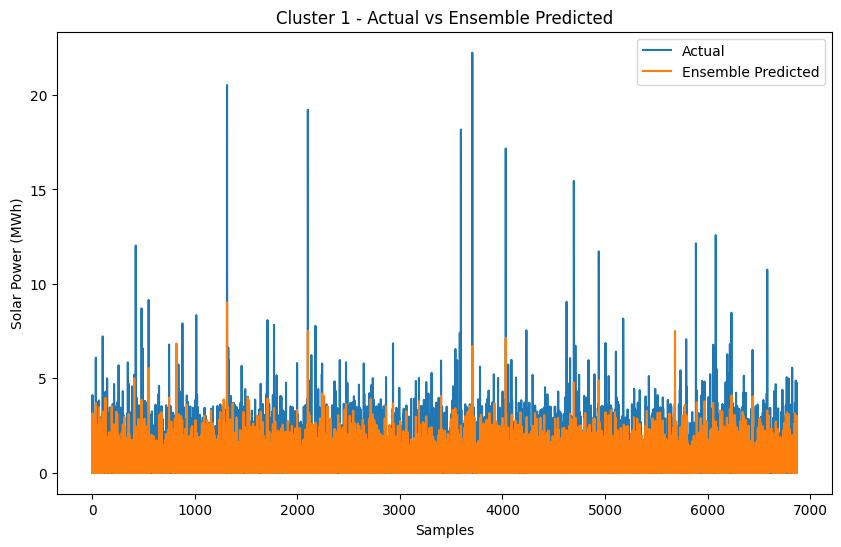

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001430 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 6294, number of used features: 12
[LightGBM] [Info] Start training from score 0.086513


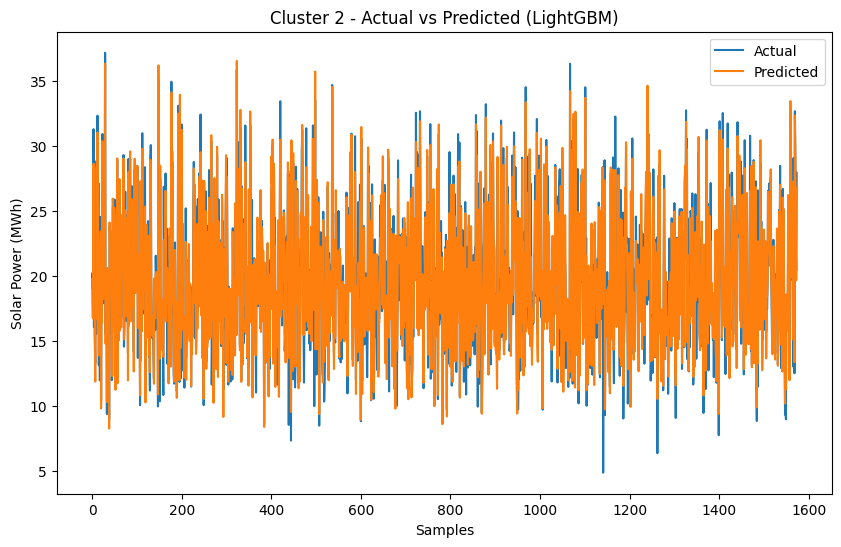

Epoch 1/100
197/197 [==============================] - 11s 21ms/step - loss: 0.6663 - val_loss: 0.3350 - lr: 0.0010
Epoch 2/100
197/197 [==============================] - 3s 17ms/step - loss: 0.3324 - val_loss: 0.1563 - lr: 0.0010
Epoch 3/100
197/197 [==============================] - 3s 14ms/step - loss: 0.2235 - val_loss: 0.1103 - lr: 0.0010
Epoch 4/100
197/197 [==============================] - 2s 12ms/step - loss: 0.1629 - val_loss: 0.1042 - lr: 0.0010
Epoch 5/100
197/197 [==============================] - 2s 12ms/step - loss: 0.1421 - val_loss: 0.0994 - lr: 0.0010
Epoch 6/100
197/197 [==============================] - 2s 12ms/step - loss: 0.1345 - val_loss: 0.0974 - lr: 0.0010
Epoch 7/100
197/197 [==============================] - 3s 14ms/step - loss: 0.1254 - val_loss: 0.0907 - lr: 0.0010
Epoch 8/100
197/197 [==============================] - 3s 17ms/step - loss: 0.1207 - val_loss: 0.0904 - lr: 0.0010
Epoch 9/100
197/197 [==============================] - 3s 15ms/step - loss: 0.1

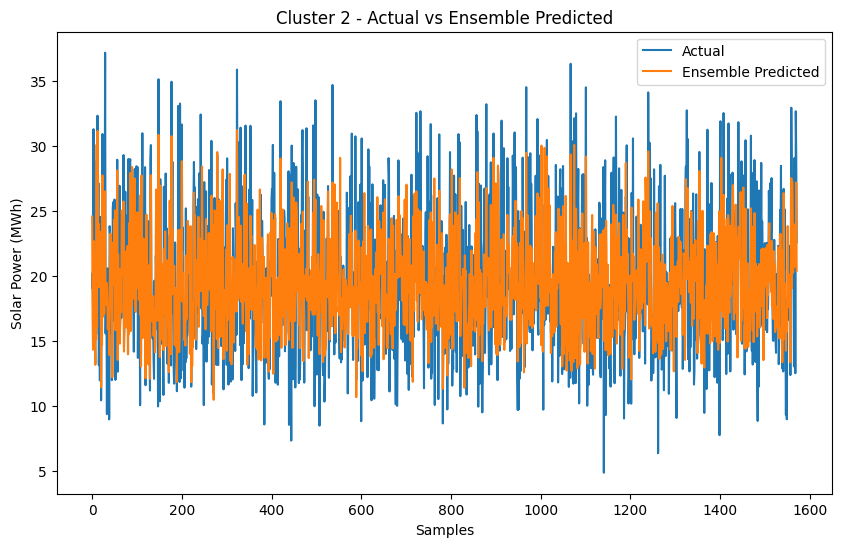

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 5798, number of used features: 12
[LightGBM] [Info] Start training from score 0.060233


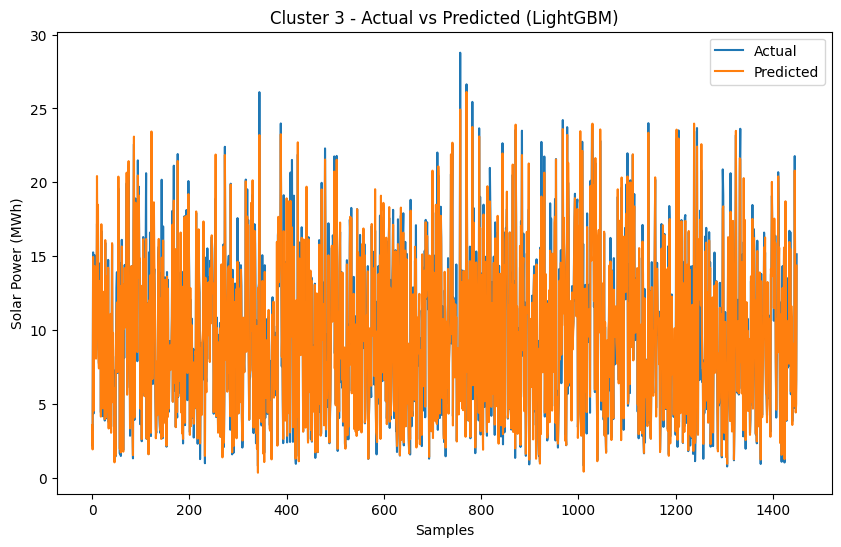

Epoch 1/100
181/181 [==============================] - 12s 27ms/step - loss: 0.8607 - val_loss: 0.3126 - lr: 0.0010
Epoch 2/100
181/181 [==============================] - 3s 16ms/step - loss: 0.4262 - val_loss: 0.2145 - lr: 0.0010
Epoch 3/100
181/181 [==============================] - 2s 13ms/step - loss: 0.3076 - val_loss: 0.1646 - lr: 0.0010
Epoch 4/100
181/181 [==============================] - 2s 13ms/step - loss: 0.2259 - val_loss: 0.1491 - lr: 0.0010
Epoch 5/100
181/181 [==============================] - 2s 13ms/step - loss: 0.1913 - val_loss: 0.1449 - lr: 0.0010
Epoch 6/100
181/181 [==============================] - 2s 13ms/step - loss: 0.1704 - val_loss: 0.1330 - lr: 0.0010
Epoch 7/100
181/181 [==============================] - 3s 16ms/step - loss: 0.1660 - val_loss: 0.1309 - lr: 0.0010
Epoch 8/100
181/181 [==============================] - 3s 17ms/step - loss: 0.1566 - val_loss: 0.1314 - lr: 0.0010
Epoch 9/100
181/181 [==============================] - 3s 15ms/step - loss: 0.1

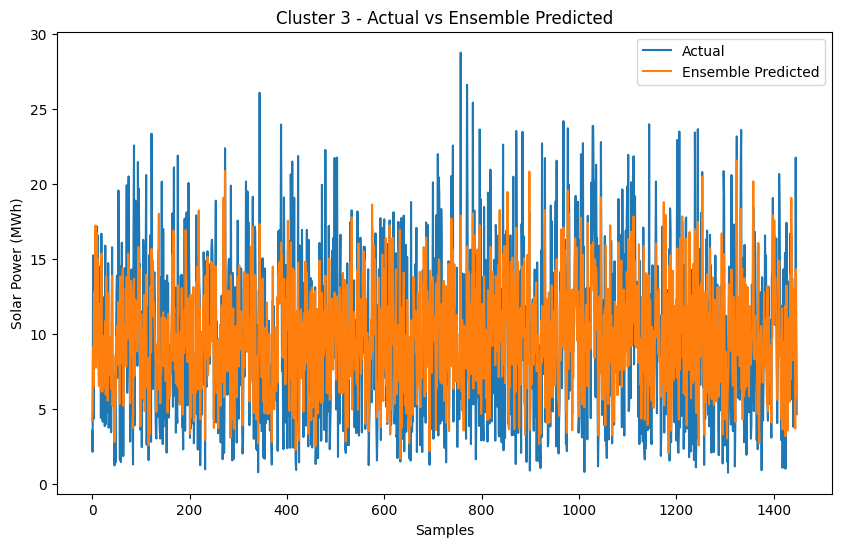

RMSE scores: [2.276761917348991, 3.3108802404308095, 0.503537852531322, 1.0160488396366432, 1.6189552517969845, 3.94219158792865, 1.1311741013105991, 3.6998440425782495]
MAE scores: [1.643039396729805, 2.524367270263931, 0.1885475562547968, 0.6179613555134615, 1.09641415198223, 3.1330062269225984, 0.7302158913603213, 2.95359972854238]
Average RMSE: 2.187424229195281
Average MAE: 1.6108939471961905


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Sample parameter grid for RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

rmse_scores = []
mae_scores = []
original_bound = []
original_describe = []
mape_scores = []
smape_scores = []


def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Assuming 'data' is already loaded and preprocessed
data['시간'] = pd.to_datetime(data['시간'])
data['year'] = data['시간'].dt.year
data['month'] = data['시간'].dt.month
data['day'] = data['시간'].dt.day
data['hour'] = data['시간'].dt.hour

# 필요한 데이터 컬럼 선택
time_features = ['year', 'month', 'day', 'hour']
target_feature = 'Solar_Power(MWh)'

for cluster in np.unique(data['Cluster']):
    cluster_data = data[data['Cluster'] == cluster].reset_index(drop=True)

    # LightGBM 모델
    X_lightgbm = cluster_data.drop(columns=['Solar_Power(MWh)', '시간'])
    y_lightgbm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)

    scaler_X = RobustScaler()
    scaler_y = RobustScaler()

    X_lightgbm_scaled = scaler_X.fit_transform(X_lightgbm)
    y_lightgbm_scaled = scaler_y.fit_transform(y_lightgbm)

    X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lightgbm_scaled, y_lightgbm_scaled, test_size=0.2, random_state=42)

    model = LGBMRegressor(random_state=42)

    # RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

    random_search.fit(X_train_lgb, y_train_lgb.ravel())

    best_model = random_search.best_estimator_
    # 예측
    y_pred_lgb = best_model.predict(X_test_lgb)


    # 예측값을 원래 스케일로 복원
    y_test_orig = scaler_y.inverse_transform(y_test_lgb)
    # 원래 스케일로 복원
    y_pred_lgb_original = scaler_y.inverse_transform(y_pred_lgb.reshape(-1, 1))

    # 0 미만의 예측 값을 0으로 처리
    y_pred_lgb_original = np.maximum(0, y_pred_lgb_original)

    # 원래 스케일로 복원된 y_test도 필요
    y_test_lgb_original = scaler_y.inverse_transform(y_test_lgb)
    y_test_df = pd.DataFrame(y_test_orig)

    bound = (y_test_orig.min(), y_test_orig.max())
    original_bound.append(bound)
    original_describe.append(y_test_df.describe())

    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_lgb_original))
    mae = mean_absolute_error(y_test_orig,y_pred_lgb_original)

    rmse_scores.append(rmse)
    mae_scores.append(mae)

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_orig, label='Actual')
    plt.plot(y_pred_lgb_original, label='Predicted')
    plt.title(f'Cluster {cluster} - Actual vs Predicted (LightGBM)')
    plt.xlabel('Samples')
    plt.ylabel('Solar Power (MWh)')
    plt.legend()
    plt.show()

    # LSTM 모델
    X_lstm = cluster_data[time_features + list(X_lightgbm.columns)]
    y_lstm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)

    X_lstm_scaled = scaler_X.fit_transform(X_lstm)
    y_lstm_scaled = scaler_y.fit_transform(y_lstm)

    time_steps = 10
    X_lstm_seq, y_lstm_seq = create_sequences(X_lstm_scaled, y_lstm_scaled, time_steps)

    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm_seq, y_lstm_seq, test_size=0.2, random_state=42)

    def lr_schedule(epoch, lr):
        if epoch < 10:
            return lr
        else:
            return lr * np.exp(-0.1)

    lstm_model = Sequential()
    lstm_model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(time_steps, X_lstm_seq.shape[2])))
    lstm_model.add(BatchNormalization())
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Bidirectional(LSTM(50)))
    lstm_model.add(BatchNormalization())
    lstm_model.add(Dropout(0.2))
    lstm_model.add(Dense(1))

    lstm_model.compile(optimizer='adam', loss='mean_squared_error')

    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    lr_scheduler = LearningRateScheduler(lr_schedule)

    lstm_model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=32, validation_data=(X_test_lstm, y_test_lstm), callbacks=[early_stopping, lr_scheduler], verbose=1)

    y_pred_lstm = lstm_model.predict(X_test_lstm)

    # LSTM 예측값을 원래 스케일로 복원
    y_pred_lstm_orig = scaler_y.inverse_transform(y_pred_lstm)

    # 0 미만의 예측 값을 0으로 처리
    y_pred_lstm_orig = np.maximum(0, y_pred_lstm_orig)


    # 앙상블 예측
    min_len = min(len(y_pred_lstm_orig), len(y_pred_lgb_original))
    y_pred_lstm_orig = y_pred_lstm_orig[:min_len]
    y_pred_lgb_original = y_pred_lgb_original[:min_len]
    y_test_lgb = y_test_orig[:min_len]
    y_test_orig = y_test_orig[:min_len]


    y_pred_ensemble = (y_pred_lstm_orig.flatten() + y_pred_lgb_original.flatten()) / 2



    rmse = np.sqrt(mean_squared_error(y_test_lgb, y_pred_ensemble))
    mae = mean_absolute_error(y_test_lgb, y_pred_ensemble)
    # MAPE와 sMAPE 계산
    mape = np.mean(np.abs((y_test_orig - y_pred_lgb_original) / y_test_orig)) * 100
    smape = np.mean(2.0 * np.abs(y_test_orig - y_pred_lgb_original) / (np.abs(y_test_orig) + np.abs(y_pred_lgb_original))) * 100

    rmse_scores.append(rmse)
    mae_scores.append(mae)
    mape_scores.append(mape)
    smape_scores.append(smape)


    print(f"Cluster {cluster} - Ensemble RMSE:", rmse)
    print(f"Cluster {cluster} - Ensemble MAE:", mae)

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_lgb, label='Actual')
    plt.plot(y_pred_ensemble, label='Ensemble Predicted')
    plt.title(f'Cluster {cluster} - Actual vs Ensemble Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Solar Power (MWh)')
    plt.legend()
    plt.show()

print("RMSE scores:", rmse_scores)
print("MAE scores:", mae_scores)
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 931
[LightGBM] [Info] Number of data points in the train set: 3623, number of used features: 12
[LightGBM] [Info] Start training from score 0.162701


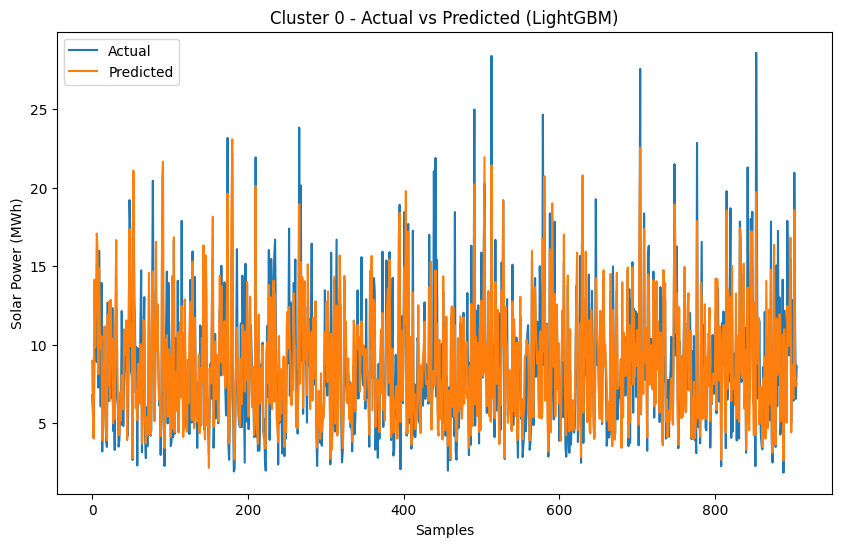

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1097
[LightGBM] [Info] Number of data points in the train set: 27483, number of used features: 12
[LightGBM] [Info] Start training from score 0.612569


<ipython-input-78-b44df8d1182a>:92: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test_orig - y_pred_lgb_original) / y_test_orig)) * 100
<ipython-input-78-b44df8d1182a>:92: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test_orig - y_pred_lgb_original) / y_test_orig)) * 100
<ipython-input-78-b44df8d1182a>:93: RuntimeWarning: invalid value encountered in divide
  smape = np.mean(2.0 * np.abs(y_test_orig - y_pred_lgb_original) / (np.abs(y_test_orig) + np.abs(y_pred_lgb_original))) * 100


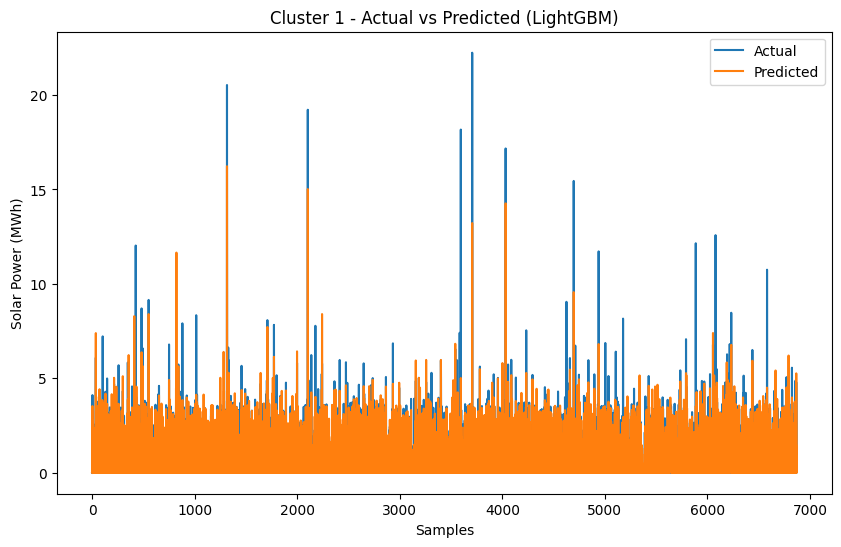

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 6294, number of used features: 12
[LightGBM] [Info] Start training from score 0.086513


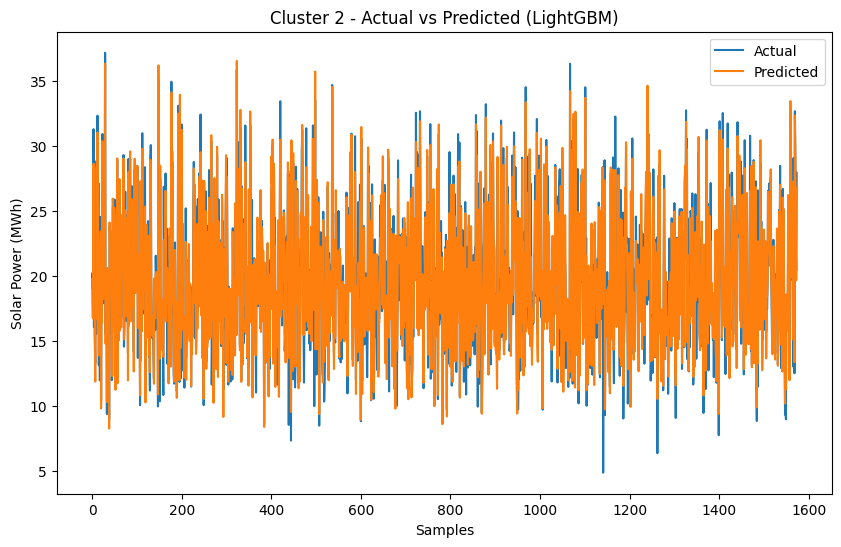

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 5798, number of used features: 12
[LightGBM] [Info] Start training from score 0.060233


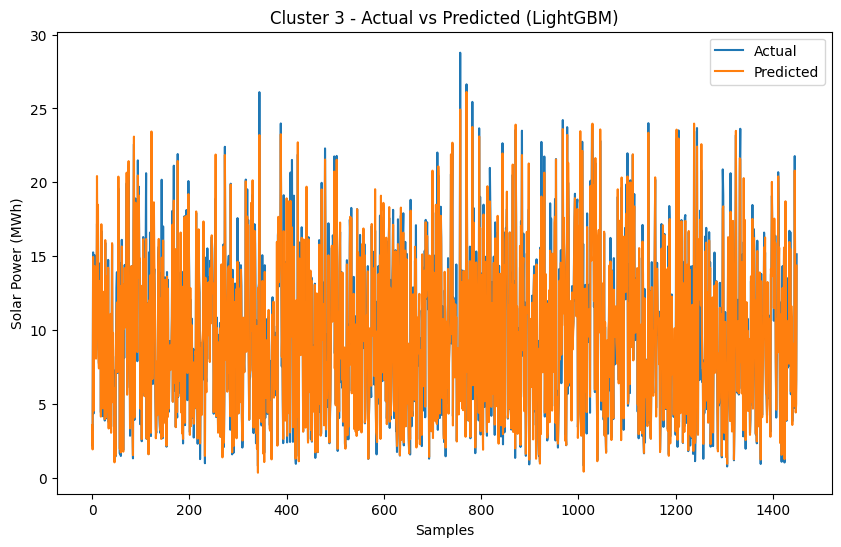

RMSE scores: [2.276761917348991, 0.503537852531322, 1.6189552517969845, 1.1311741013105991]
MAE scores: [1.643039396729805, 0.1885475562547968, 1.09641415198223, 0.7302158913603213]
Average RMSE: 1.3826072807469743
Average MAE: 0.9145542490817883


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# Sample parameter grid for RandomizedSearchCV
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}

rmse_scores = []
mae_scores = []
original_bound = []
original_describe = []
mape_scores = []
smape_scores = []


def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Assuming 'data' is already loaded and preprocessed
data['시간'] = pd.to_datetime(data['시간'])
data['year'] = data['시간'].dt.year
data['month'] = data['시간'].dt.month
data['day'] = data['시간'].dt.day
data['hour'] = data['시간'].dt.hour

# 필요한 데이터 컬럼 선택
time_features = ['year', 'month', 'day', 'hour']
target_feature = 'Solar_Power(MWh)'

for cluster in np.unique(data['Cluster']):
    cluster_data = data[data['Cluster'] == cluster].reset_index(drop=True)

    # LightGBM 모델
    X_lightgbm = cluster_data.drop(columns=['Solar_Power(MWh)', '시간'])
    y_lightgbm = cluster_data['Solar_Power(MWh)'].values.reshape(-1, 1)

    scaler_X = RobustScaler()
    scaler_y = RobustScaler()

    X_lightgbm_scaled = scaler_X.fit_transform(X_lightgbm)
    y_lightgbm_scaled = scaler_y.fit_transform(y_lightgbm)

    X_train_lgb, X_test_lgb, y_train_lgb, y_test_lgb = train_test_split(X_lightgbm_scaled, y_lightgbm_scaled, test_size=0.2, random_state=42)

    model = LGBMRegressor(random_state=42)

    # RandomizedSearchCV를 사용하여 하이퍼파라미터 튜닝
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1, random_state=42)

    random_search.fit(X_train_lgb, y_train_lgb.ravel())

    best_model = random_search.best_estimator_
    # 예측
    y_pred_lgb = best_model.predict(X_test_lgb)


    #  원래 스케일로 복원
    y_test_orig = scaler_y.inverse_transform(y_test_lgb)
    # 예측값을 원래 스케일로 복원
    y_pred_lgb_original = scaler_y.inverse_transform(y_pred_lgb.reshape(-1, 1))

    # 0 미만의 예측 값을 0으로 처리
    y_pred_lgb_original = np.maximum(0, y_pred_lgb_original)

    # 원래 스케일로 복원된 y_test도 필요

    y_test_df = pd.DataFrame(y_test_orig)

    bound = (y_test_orig.min(), y_test_orig.max())
    original_bound.append(bound)
    original_describe.append(y_test_df.describe())

    rmse = np.sqrt(mean_squared_error(y_test_orig, y_pred_lgb_original))
    mae = mean_absolute_error(y_test_orig,y_pred_lgb_original)

    # MAPE와 sMAPE 계산
    mape = np.mean(np.abs((y_test_orig - y_pred_lgb_original) / y_test_orig)) * 100
    smape = np.mean(2.0 * np.abs(y_test_orig - y_pred_lgb_original) / (np.abs(y_test_orig) + np.abs(y_pred_lgb_original))) * 100


    mape_scores.append(mape)
    smape_scores.append(smape)

    rmse_scores.append(rmse)
    mae_scores.append(mae)

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_orig, label='Actual')
    plt.plot(y_pred_lgb_original, label='Predicted')
    plt.title(f'Cluster {cluster} - Actual vs Predicted (LightGBM)')
    plt.xlabel('Samples')
    plt.ylabel('Solar Power (MWh)')
    plt.legend()
    plt.show()











print("RMSE scores:", rmse_scores)
print("MAE scores:", mae_scores)
print("Average RMSE:", np.mean(rmse_scores))
print("Average MAE:", np.mean(mae_scores))
